<a href="https://colab.research.google.com/github/coegoke/Spaceship-Titanic/blob/main/Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from dython.nominal import associations
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV


In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/coegoke/Spaceship-Titanic/main/test.csv")
df_train = pd.read_csv("https://raw.githubusercontent.com/coegoke/Spaceship-Titanic/main/train.csv")

#Explor Data

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data Preprocessing

##Kolom yang tidak terpakai

In [ ]:
# Informasi rinci mengenai kolom dan baris data
data_stat = pd.DataFrame()
data_stat.index = df_train.columns
data_stat["unique_value"] = df_train.nunique()
data_stat["missing_rate"] = df_train.isna().mean()

data_stat["dtype"] = df_train.dtypes
data_stat

,unique_value,missing_rate,dtype
PassengerId,8693,0.000000,object
HomePlanet,3,0.023122,object
CryoSleep,2,0.024963,object
Cabin,6560,0.022892,object
Destination,3,0.020936,object
Age,80,0.020591,float64
VIP,2,0.023352,object
RoomService,1273,0.020821,float64
FoodCourt,1507,0.021051,float64
ShoppingMall,1115,0.023927,float64


In [ ]:
# Check inconsistent data
for col in df_test.columns:
       print("=="*10)
       print(f" {col}", df_test[col].unique())

 PassengerId ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
 HomePlanet ['Earth' 'Europa' 'Mars' nan]
 CryoSleep [True False nan]
 Cabin ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
 Destination ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
 Age [27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33. nan  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.
  3.  9. 25. 42. 50. 41. 32. 49. 55. 60. 47. 58. 28. 12. 52. 15. 43. 54.
 70. 37. 59. 61. 63. 53.  4. 10. 65. 13. 51. 79. 74. 67. 69. 57. 72. 75.
 11. 73. 71. 64. 62. 78. 77. 68.]
 VIP [False nan True]
 RoomService [0.0000e+00 1.0000e+01 3.3900e+02 9.3200e+02 2.0000e+00 2.6000e+01
        nan 3.9000e+01 1.7840e+03 2.9300e+02 5.9800e+02 1.4000e+01
 4.8300e+02 6.6000e+01 1.0000e+00 1.0370e+03 3.9660e+03 4.6000e+01
 4.1300e+02 3.7800e+02 3.2000e+01 8.3200e+02 3.6200e+02 7.5600e+02
 1.9700e+02 6.0000e+00 2.6100e+02 1.6690e+03 4.4000e+01 3.3000e+01
 7.1700e+02 4.7620e

In [ ]:
# Kolom yang terlalu unik
vari_col = data_stat[data_stat["unique_value"] == df_train.shape[0]].index.to_list()
print("Kolom yang terlalu unik:")
print(vari_col)
print()

# Kolom dengan kategori yang banyak
cat_col_stat = data_stat[data_stat["dtype"] == "object"]
vari_cat_col = cat_col_stat[cat_col_stat["unique_value"] > 8000].index.to_list()
print("Kolom dengan kategori yang banyak:")
print(vari_cat_col)
print()

Kolom yang terlalu unik:
['PassengerId']

Kolom dengan kategori yang banyak:
['PassengerId', 'Name']



In [ ]:
removed_features =vari_col + vari_cat_col 

In [ ]:
# Hilangkan fitur yang tidak terpakai
pre_df = df_train.loc[:, ~df_train.columns.isin(removed_features)].copy()
pre_df.shape

(8693, 12)

##Cabin
kita perlu mempreprocessing fitur Cabin dikarenakan memiliki value yang cukup unik. maka kita lakukan label encoder terlebih dahulu

In [ ]:
label_encoder = LabelEncoder()
pre_df['Cabin'] = label_encoder.fit_transform(pre_df['Cabin'])
pre_df['Cabin'] = pre_df['Cabin'].replace(6560, np.NaN)
pre_df['Cabin'].value_counts()

6156.0    8
4695.0    7
312.0     7
5092.0    7
6527.0    7
         ..
5892.0    1
1597.0    1
5876.0    1
5874.0    1
4479.0    1
Name: Cabin, Length: 6560, dtype: int64

#Imputasi Missing Value

In [ ]:
pre_df.isna().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
Transported     0.000000
dtype: float64

##One Hot Encoding
kita perlu melakukan One Hot Encoding terlebih dahulu dikarenakan untuk handling missing value dengan KNN Imputer

In [ ]:
df = pd.get_dummies(pre_df)
df

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,149.0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,1,0,0,0,1,1,0
1,2184.0,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,1,0,0,0,1,1,0
2,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,1,0,0,0,1,0,1
3,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,1,0,0,0,1,1,0
4,2186.0,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,146.0,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,1,0,1,0,1,0,0,0,1
8689,5280.0,18.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0,1,0,1,0,1,0
8690,5285.0,26.0,0.0,0.0,1872.0,1.0,0.0,True,1,0,0,1,0,0,0,1,1,0
8691,2131.0,32.0,0.0,1049.0,0.0,353.0,3235.0,False,0,1,0,1,0,1,0,0,1,0


In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=True)
df = pd.DataFrame(knn.fit_transform(df))

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,149.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2184.0,24.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2186.0,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,146.0,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,5280.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,5285.0,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,2131.0,32.0,0.0,1049.0,0.0,353.0,3235.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


drop kolom yang tidak memiliki value dan kolom target

In [ ]:
df = df.drop(columns=np.arange(18, 25, 1))
df = df.drop(columns=(7))

In [ ]:
df.isna().mean().sort_values(ascending=False)
df.shape

(8693, 17)

#Modelling

##Bagi kolom features dan target

In [ ]:
y = df_train["Transported"].copy()
X = df

print("Label shape:")
print(y.shape)

print("Features shape:")
print(X.shape)

Label shape:
(8693,)
Features shape:
(8693, 17)


##Standarization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.022717,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.332978,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.000152,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000152,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.333283,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.022259,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,0.805001,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,0.805763,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,0.324897,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


##Split Data Train dan Test

In [ ]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (6954, 17)
Shape of y_train (6954,)
Shape of X_test (1739, 17)
Shape of y_test (1739,)


##Choose the best Classifier

In [ ]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

##Cross Validation
pada tahap ini, kita melakukan cross validation dengan scoring accuracy

In [ ]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [ ]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.726279,0.734330,0.722829,0.716916,0.738205
RandomForestClassifier,0.772283,0.768833,0.786084,0.796318,0.797468
AdaBoostClassifier,0.782634,0.793560,0.784359,0.802647,0.794016
ExtraTreesClassifier,0.769408,0.771133,0.782634,0.788838,0.795167
GradientBoostingClassifier,0.785509,0.792984,0.790109,0.809551,0.805524
BaggingClassifier,0.757907,0.751581,0.739505,0.768700,0.781933
KNeighborsClassifier,0.729155,0.742381,0.726279,0.774453,0.752589
LogisticRegression,0.763657,0.761932,0.756757,0.758343,0.769850
GaussianNB,0.728580,0.719954,0.746406,0.765247,0.745109
SVC,0.755032,0.755032,0.742956,0.754315,0.768124


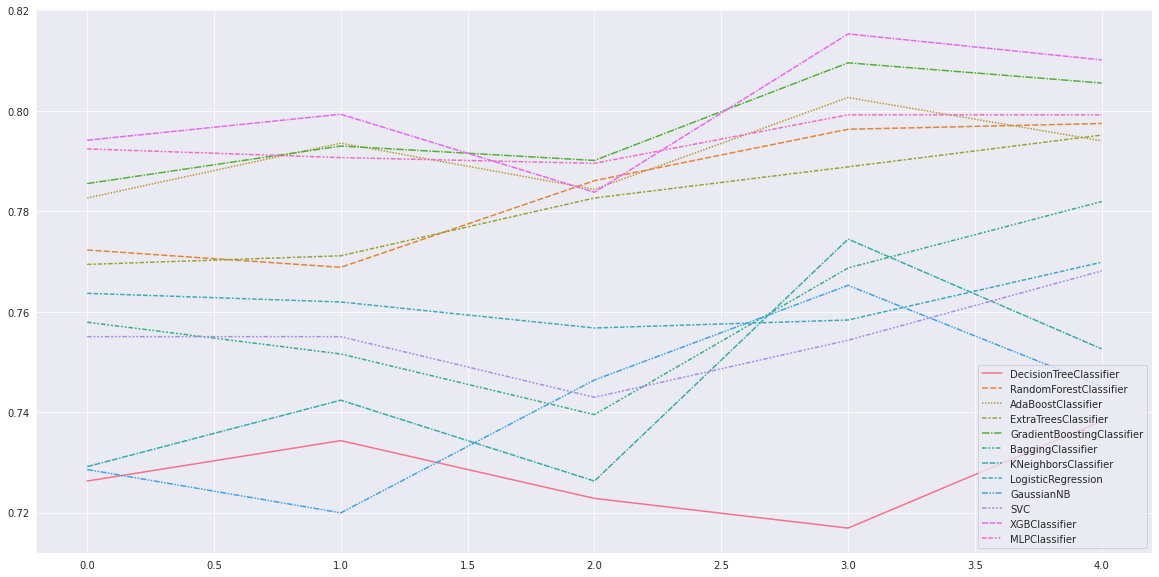

In [ ]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [ ]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [ ]:
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [ ]:
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
XGBClassifier,0.800532,0.011254
GradientBoostingClassifier,0.796735,0.009225
MLPClassifier,0.794203,0.004177
AdaBoostClassifier,0.791443,0.007272
RandomForestClassifier,0.784197,0.011871
ExtraTreesClassifier,0.781436,0.009956
LogisticRegression,0.762108,0.004587
BaggingClassifier,0.759925,0.014505
SVC,0.755092,0.007972
KNeighborsClassifier,0.744971,0.017513


In [ ]:
# oversampling
from imblearn.over_sampling import SMOTE
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

##Fit And Evaluation

In [ ]:
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train_over, y_train_over)
    # accuracy for training set
    train_score.append(model.score(X_train_over, y_train_over))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [ ]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
RandomForestClassifier,0.999857,0.776883,0.222974
ExtraTreesClassifier,0.999857,0.772858,0.226999
DecisionTreeClassifier,0.999857,0.727430,0.272428
BaggingClassifier,0.983571,0.757907,0.225665
KNeighborsClassifier,0.835571,0.728580,0.106992
GradientBoostingClassifier,0.823571,0.789534,0.034037
XGBClassifier,0.815857,0.792984,0.022873
MLPClassifier,0.806571,0.784359,0.022213
AdaBoostClassifier,0.798143,0.778033,0.020110
LogisticRegression,0.762571,0.753306,0.009265


##Cross Validation for Some Metrics
Kali ini kita akan lakukan cross validation untuk mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [ ]:
skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [ ]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,XGBClassifier,0.551185,0.012456,0.800532,0.783467,0.834635,0.808132
1,GradientBoostingClassifier,1.282245,0.012047,0.796735,0.785540,0.820473,0.802538
2,MLPClassifier,7.174644,0.011326,0.795009,0.778075,0.831204,0.803147
3,AdaBoostClassifier,0.433385,0.036763,0.791443,0.776432,0.823207,0.799060
4,RandomForestClassifier,1.130933,0.066390,0.786037,0.810695,0.750348,0.779289
5,ExtraTreesClassifier,1.410743,0.142510,0.782587,0.812432,0.739154,0.773883
6,LogisticRegression,0.152390,0.009578,0.762108,0.803884,0.698492,0.747119
7,SVC,2.936942,0.633979,0.755092,0.817745,0.661719,0.730997
8,BaggingClassifier,0.310729,0.017561,0.754750,0.796389,0.689140,0.738821
9,KNeighborsClassifier,0.005135,0.372703,0.744971,0.766031,0.713343,0.738111


#Best Model (XGBClassifier)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Fit classifier
xgb.fit(X_train_over, y_train_over)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 81.59%
Test Accuracy : 79.3%
Precision Score : 76.76%
Recall Score : 84.62%
F1 Score : 80.5%


#Hyperparameter Tuning

In [ ]:
params = {
    'booster':['gbtree', 'gblinear', 'dart'],
    'use_rmm':['true','false'],
    'eta':[0.1, 0.01, 0.001, 0.0001],
    'gamma':range(0, 11, 1),
    'max_depth':range(10, 501, 5),
    'min_child_weight':range(0, 201, 5),
    'tree_method':['gpu_hist', 'auto', 'approx', 'exact', 'hist'],
    'scale_pos_weight':range(0, 91, 3),
    'max_delta_step':range(10, 301, 5),
    'max_leaves':range(0, 101, 5),
    'eval_metric':['logloss', 'error', 'auc'],
    'sampling_method':['gradient_based', 'uniform'],
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=params, 
    n_iter=100,
    scoring='accuracy', cv=5, 
    n_jobs=-1)

In [ ]:
xgb_tuned.fit(X_train_over, y_train_over)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'eta': [0.1, 0.01, 0.001, 0.0001],
                                        'eval_metric': ['logloss', 'error',
                                                        'auc'],
                                        'gamma': range(0, 11),
                                        'max_delta_step': range(10, 301, 5),
                                        'max_depth': range(10, 501, 5),
                                        'max_leaves': range(0, 101, 5),
                                        'min_child_weight': range(0, 201, 5),
                                        'sampling_method': ['gradient_based',
                                                            'uniform'],
                                        'scale_pos_weight': ran

In [ ]:
xgb_tuned.best_estimator_

XGBClassifier(eta=0.1, eval_metric='logloss', gamma=9, max_delta_step=190,
              max_depth=340, max_leaves=90, min_child_weight=40,
              sampling_method='uniform', scale_pos_weight=3, tree_method='hist',
              use_rmm='false')

In [ ]:
# Predict test set
y_pred_tuned = xgb_tuned.predict(X_test)

#Calculate accuracy, precision, recall, and f1-score
train_score_tuned = round((xgb_tuned.score(X_train_over, y_train_over) * 100), 2)
test_score_tuned = round((xgb_tuned.score(X_test, y_test) * 100), 2)
prec_score_tuned = round((precision_score(y_test, y_pred_tuned)) * 100, 2)
recall_score_tuned = round((recall_score(y_test, y_pred_tuned)) * 100, 2)
f1_tuned = round(f1_score(y_test, y_pred_tuned)*100, 2)

print('Training Accuracy : {}%'.format(train_score_tuned))
print('Test Accuracy : {}%'.format(test_score_tuned))
print('Precision Score : {}%'.format(prec_score_tuned))
print('Recall Score : {}%'.format(recall_score_tuned))
print('F1 Score : {}%'.format(f1_tuned))

Training Accuracy : 80.19%
Test Accuracy : 77.11%
Precision Score : 71.28%
Recall Score : 91.57%
F1 Score : 80.16%


#Data test Processing

In [ ]:
# label_encoder = LabelEncoder()
# df_test['CryoSleep'] = label_encoder.fit_transform(df_test['CryoSleep'])
# df_test['CryoSleep'] = df_test['CryoSleep'].replace(2, np.NaN)
# df_test['HomePlanet'] = label_encoder.fit_transform(df_test['HomePlanet'])
# df_test['HomePlanet'] = df_test['HomePlanet'].replace(3, np.NaN)
# df_test['VIP'] = label_encoder.fit_transform(df_test['VIP'])
# df_test['VIP'] = df_test['VIP'].replace(2, np.NaN)
# df_test['Destination'] = label_encoder.fit_transform(df_test['Destination'])
# df_test['Destination'] = df_test['Destination'].replace(3, np.NaN)
df_test['Cabin'] = label_encoder.fit_transform(df_test['Cabin'])
df_test['Cabin'] = df_test['Cabin'].replace(6560, np.NaN)

In [ ]:
df_test = df_test.drop(columns=['PassengerId','Name'])

In [ ]:
df_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin             0
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [ ]:
df_test = pd.get_dummies(df_test)
df_test

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,2784,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,1867,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,257,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,259,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,1940,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2679,34.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
4273,3265,42.0,0.0,847.0,17.0,10.0,144.0,1,0,0,1,0,0,0,1,1,0
4274,602,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,1,0
4275,603,NaN,0.0,2680.0,0.0,0.0,523.0,0,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=True)
df_test_1 = pd.DataFrame(knn.fit_transform(df_test))
df_test_1 = df_test_1.drop(columns=np.arange(17, 23, 1))
# df_test_1 = pd.DataFrame(MinMaxScaler().fit_transform(df_test_1))
# df_test_1

In [ ]:
final = xgb_tuned.predict(df_test_1)

# Save Model

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(xgb_tuned, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7711328349626222


In [ ]:
submission = pd.read_csv("https://raw.githubusercontent.com/coegoke/Spaceship-Titanic/main/sample_submission.csv")

In [ ]:
submission['Transported'] = final.astype("bool")
submission.to_csv("submission.csv",index=False)
submission['Transported'].value_counts()

True     2303
False    1974
Name: Transported, dtype: int64